### About

#### Build a machine learning model to bucket the customer's future reviews under the respective topic category.

### Import Necessary Libraries

In [ ]:
pip install contractions

In [ ]:
pip install unidecode

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('wordnet')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
import re
import random
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
import warnings
import contractions
import unidecode
from collections import Counter
import spacy
from nltk.stem import PorterStemmer
porter = PorterStemmer()
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load train and test dataset

In [ ]:
train=pd.read_csv('/content/gdrive/MyDrive/uhack_sentiments_20_decode_code_words/train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/uhack_sentiments_20_decode_code_words/test.csv')

### Let's see the structure of train and test dataset.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Id                             6136 non-null   int64 
 1   Review                         6136 non-null   object
 2   Components                     6136 non-null   int64 
 3   Delivery and Customer Support  6136 non-null   int64 
 4   Design and Aesthetics          6136 non-null   int64 
 5   Dimensions                     6136 non-null   int64 
 6   Features                       6136 non-null   int64 
 7   Functionality                  6136 non-null   int64 
 8   Installation                   6136 non-null   int64 
 9   Material                       6136 non-null   int64 
 10  Price                          6136 non-null   int64 
 11  Quality                        6136 non-null   int64 
 12  Usability                      6136 non-null   int64 
 13  Pol

#### The train dataset contains 6136 data entries and 14 columns.
#### The target column is **Sentiment**.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             2631 non-null   int64  
 1   Review                         2631 non-null   object 
 2   Components                     0 non-null      float64
 3   Delivery and Customer Support  0 non-null      float64
 4   Design and Aesthetics          0 non-null      float64
 5   Dimensions                     0 non-null      float64
 6   Features                       0 non-null      float64
 7   Functionality                  0 non-null      float64
 8   Installation                   0 non-null      float64
 9   Material                       0 non-null      float64
 10  Price                          0 non-null      float64
 11  Quality                        0 non-null      float64
 12  Usability                      0 non-null      f

#### The test dataset contains 2631 entries and 14 columns.

### Let's check if there is any missing value in train and test dataset.

In [ ]:
train.isnull().sum()

Id                               0
Review                           0
Components                       0
Delivery and Customer Support    0
Design and Aesthetics            0
Dimensions                       0
Features                         0
Functionality                    0
Installation                     0
Material                         0
Price                            0
Quality                          0
Usability                        0
Polarity                         0
dtype: int64

In [ ]:
test.isnull().sum()

Id                                  0
Review                              0
Components                       2631
Delivery and Customer Support    2631
Design and Aesthetics            2631
Dimensions                       2631
Features                         2631
Functionality                    2631
Installation                     2631
Material                         2631
Price                            2631
Quality                          2631
Usability                        2631
Polarity                         2631
dtype: int64

#### The above summary shows that there is no missing in any column.

### Let's view the sample data from train and test dataset

In [ ]:
train.head()

Id                                             Review  ...  Usability  Polarity
0   0  For some reason everybody complains and I'm co...  ...          1         0
1   1  I like everything about it, great choice of sp...  ...          0         1
2   2  Excellent ceiling fan brace. Easy to install a...  ...          0         1
3   3  Work great easy to use . No issues at all with...  ...          1         1
4   4  I would recommend this product because it is p...  ...          0         1

[5 rows x 14 columns]

In [ ]:
test.head()

Id                                             Review  ...  Usability  Polarity
0   0  Made of very thin cheap metal broke on very fi...  ...        NaN       NaN
1   1  As good as the brand names, no jams or misfire...  ...        NaN       NaN
2   2  unit was easy to use, with understandable in s...  ...        NaN       NaN
3   3  I am the new family plumber. Works well. No pr...  ...        NaN       NaN
4   4                       Seems to be holding up well.  ...        NaN       NaN

[5 rows x 14 columns]

### Let's perform exploratory data analysis.First, let see the target columns distribution.

### The dataset have more than one target label.So basically a  multioutput classification problem.Let's see how review's are claasified under each topics. 

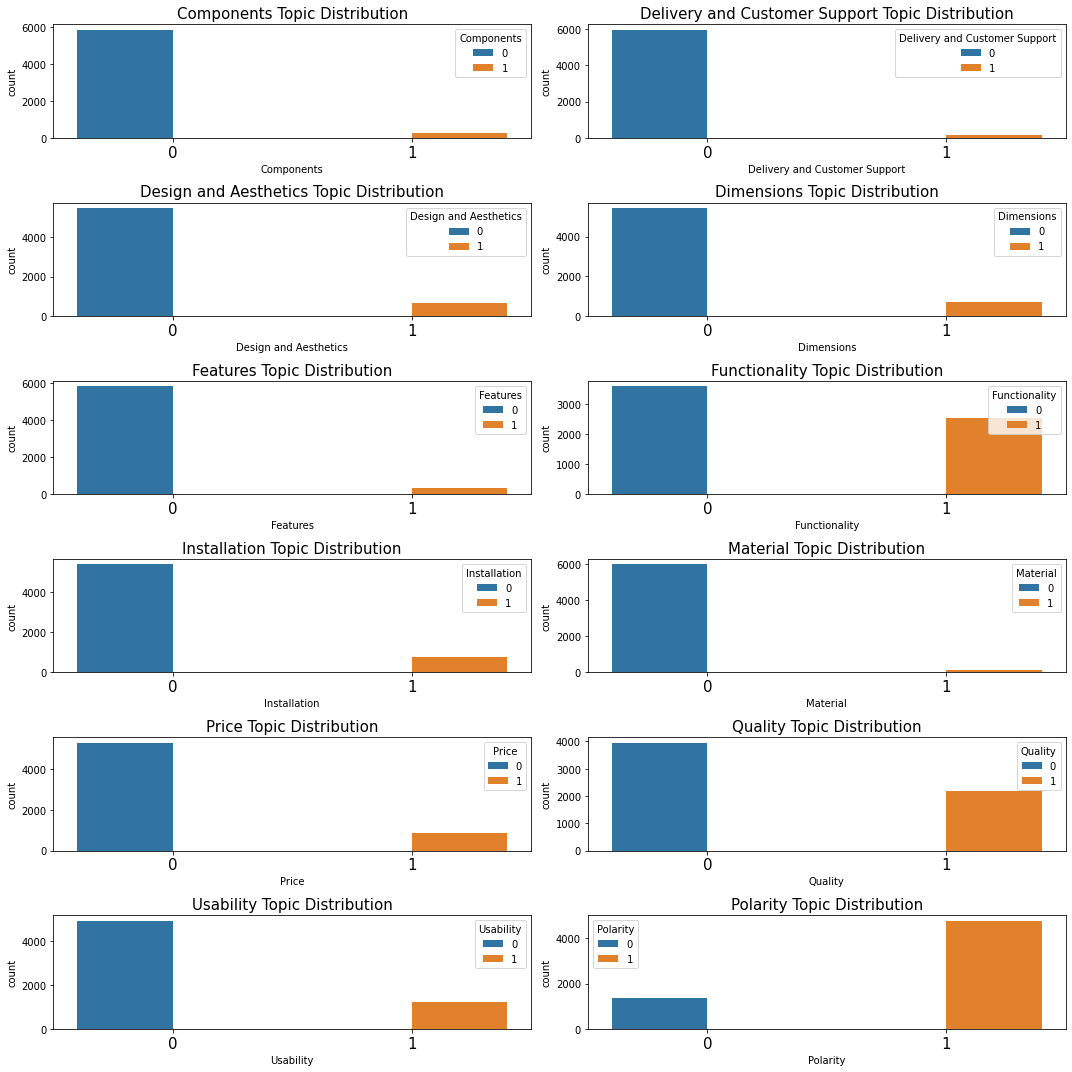

In [ ]:
fig=plt.subplots(figsize=(15, 15))
for i,col  in enumerate(train.iloc[:,2:14].columns.values):    
       _=plt.subplot(6,2,i+1)
       _=sns.countplot(x=train[col],hue=train[col])
       _=plt.title(col+' Topic Distribution',fontsize=15)
       _=plt.xlabel(col,fontsize=10)
       _=plt.xticks(fontsize=15)
       _=plt.tight_layout()  
plt.show()  

In [ ]:
for col in train.iloc[:,2:14].columns.values:    
  print("="*100)
  print(train[col].value_counts())
  print("-"*100)

0    5862
1     274
Name: Components, dtype: int64
----------------------------------------------------------------------------------------------------
0    5957
1     179
Name: Delivery and Customer Support, dtype: int64
----------------------------------------------------------------------------------------------------
0    5486
1     650
Name: Design and Aesthetics, dtype: int64
----------------------------------------------------------------------------------------------------
0    5441
1     695
Name: Dimensions, dtype: int64
----------------------------------------------------------------------------------------------------
0    5823
1     313
Name: Features, dtype: int64
----------------------------------------------------------------------------------------------------
0    3598
1    2538
Name: Functionality, dtype: int64
----------------------------------------------------------------------------------------------------
0    5374
1     762
Name: Installation, dtype: int64
----

#### The above plot explains that there is an imbalance in all target class distributions.

#### Let's create a wordcloud and see most frequent words in three classes.

### Let's see how reviews are classified under each topics 

#### For better visualization let's first 6 target label reviews.

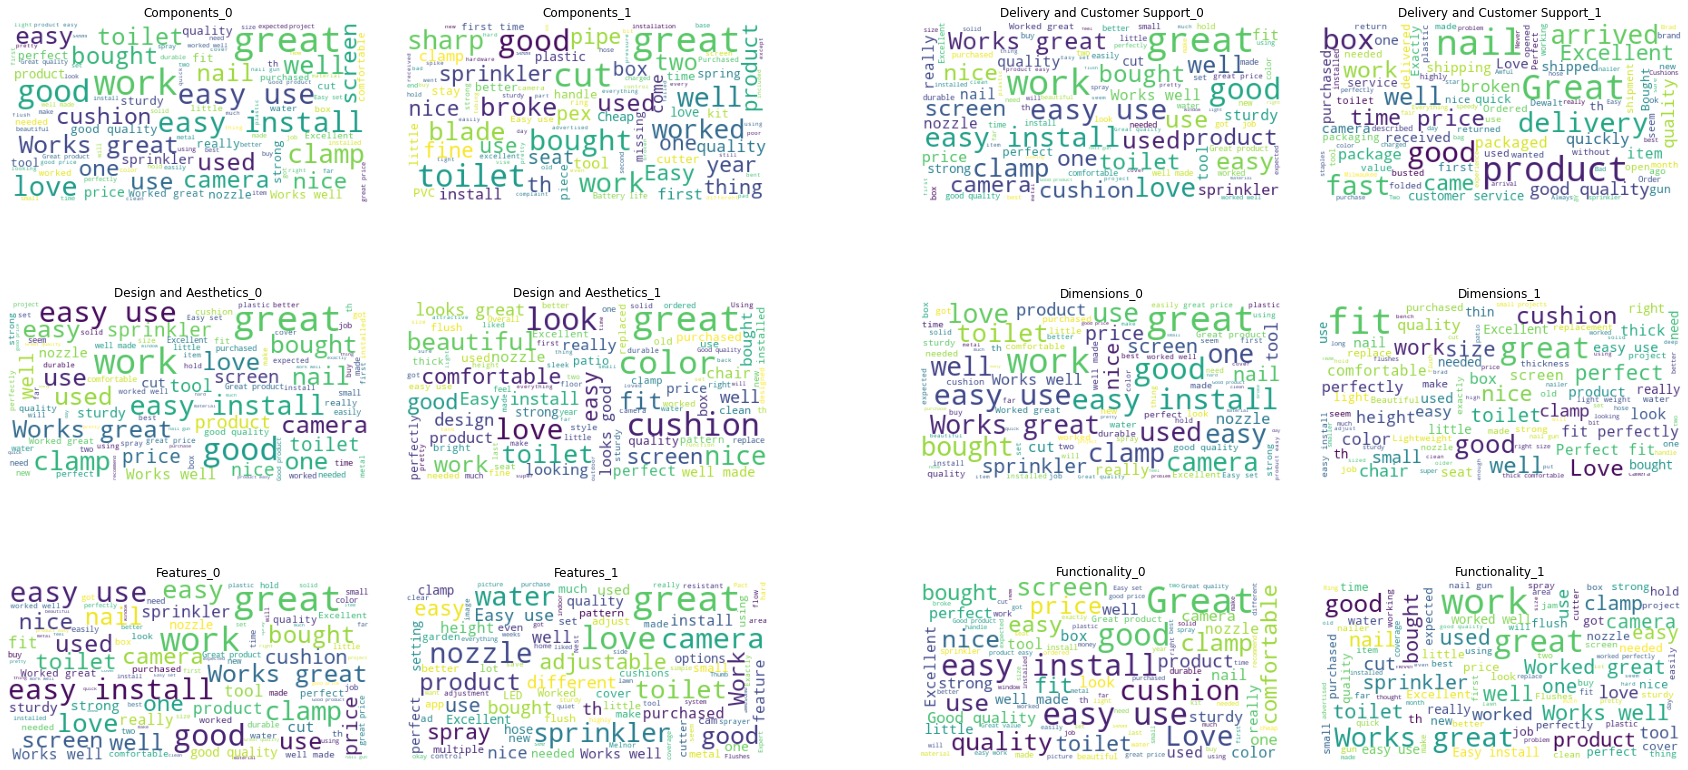

In [ ]:
fig = plt.figure(figsize=(30, 30),constrained_layout=True)
outer = gridspec.GridSpec(6, 2, wspace=0.2, hspace=0.2)

for i,col  in enumerate(train.iloc[:,2:8].columns.values):
  
 
  inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1
                    )
  
  
  for x in train[col].unique():    
    ax = plt.Subplot(fig, inner[x])
    wc = WordCloud(background_color="white", max_words=100, stopwords=stopwords,
                max_font_size=40, random_state=42).generate(train[train[col]==x]['Review'].to_string())
    fig.add_subplot(ax)
    plt.imshow(wc)
    ax.set_title(f"{col}_{x}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    fig.tight_layout()
  
         

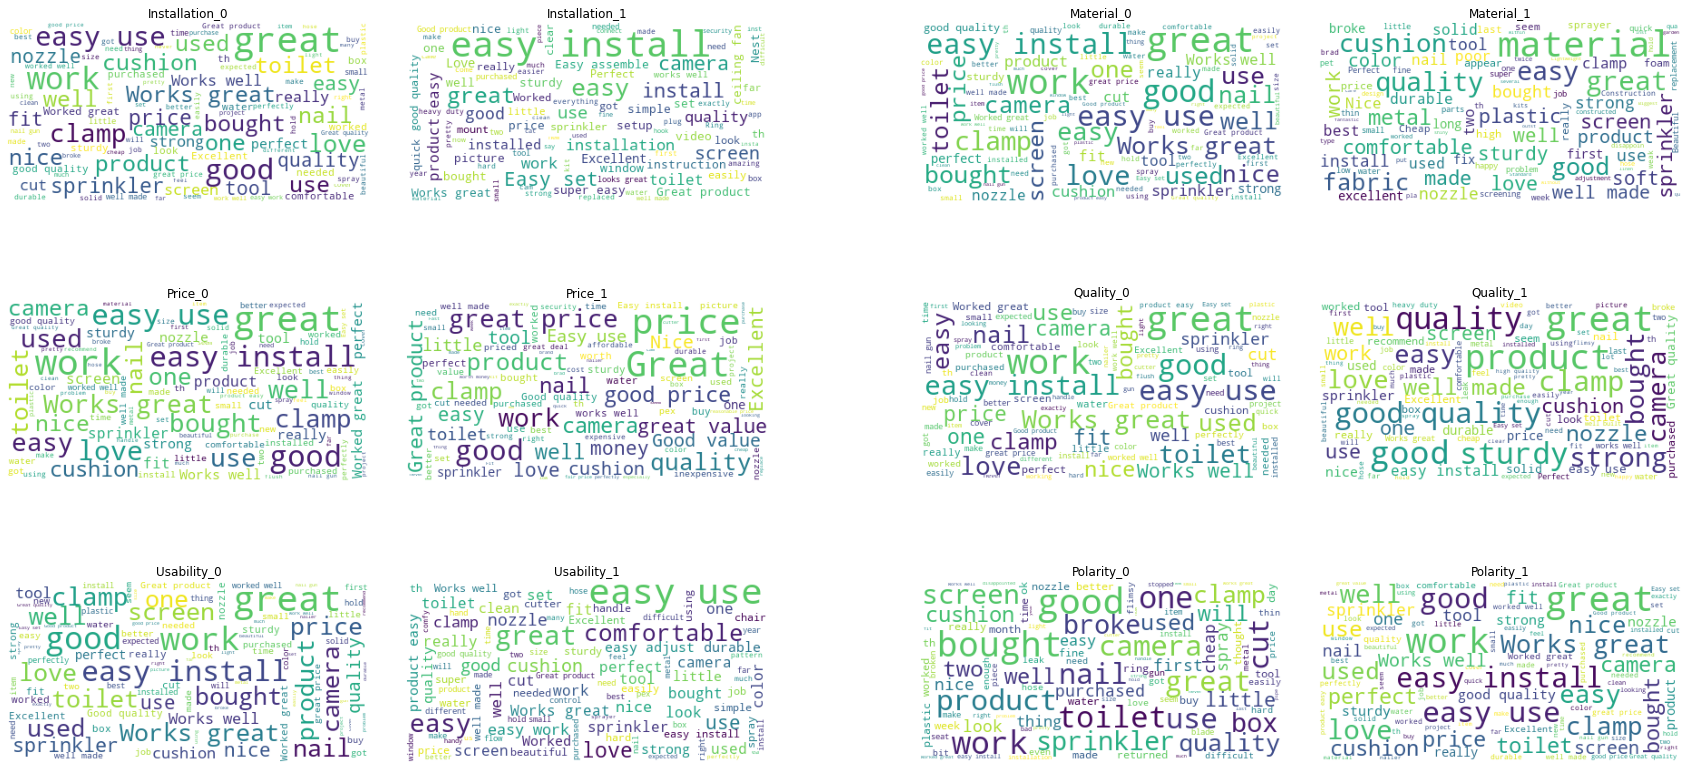

In [ ]:
fig = plt.figure(figsize=(30, 30),constrained_layout=True)
outer = gridspec.GridSpec(6, 2, wspace=0.2, hspace=0.2)

for i,col  in enumerate(train.iloc[:,8:14].columns.values):
  
 
  inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1
                    )
  
  
  for x in train[col].unique():    
    ax = plt.Subplot(fig, inner[x])
    wc = WordCloud(background_color="white", max_words=100, stopwords=stopwords,
                max_font_size=40, random_state=42).generate(train[train[col]==x]['Review'].to_string())
    fig.add_subplot(ax)
    plt.imshow(wc)
    ax.set_title(f"{col}_{x}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    fig.tight_layout()
  
         

### Let's see the number of characters in reviews.

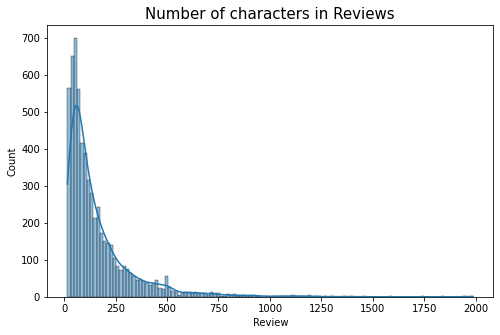

In [ ]:
_=plt.figure(figsize=(8, 5))
_=sns.histplot(train['Review'].str.len(),kde=True)
_=plt.title( 'Number of characters in Reviews',fontsize=15)

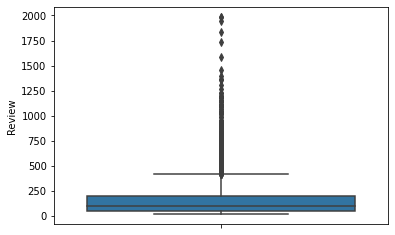

In [ ]:
sns.boxplot(y=train['Review'].str.len());

In [ ]:
train['Review'].str.len().describe()

count    6136.000000
mean      161.012060
std       174.783893
min        16.000000
25%        55.000000
50%       101.000000
75%       200.000000
max      1987.000000
Name: Review, dtype: float64

#### The above histogram explains that the average length of the character in review is 161.

#### The review character's length range from 16 to 1987.

### Let's see the number of words in review.

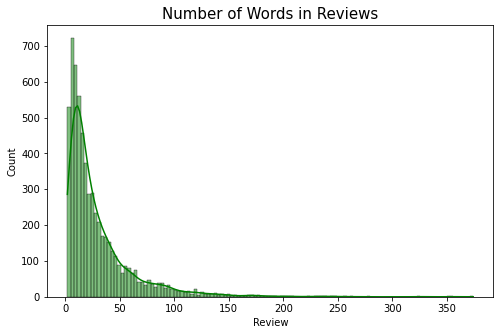

In [ ]:
_=plt.figure(figsize=(8, 5))
_=sns.histplot(train['Review'].str.split().map(lambda x: len(x)),kde=True,color='Green')
_=plt.title( 'Number of Words in Reviews',fontsize=15)

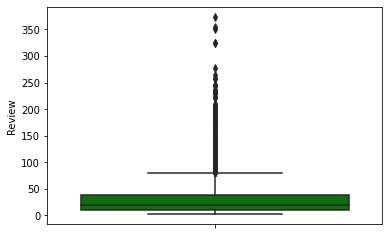

In [ ]:
sns.boxplot(y=train['Review'].str.split().map(lambda x: len(x)),color='Green');

In [ ]:
train['Review'].str.split().map(lambda x: len(x)).describe()

count    6136.000000
mean       30.008475
std        32.793149
min         2.000000
25%        10.000000
50%        19.000000
75%        38.000000
max       374.000000
Name: Review, dtype: float64

#### The above histogram explains that the average number of words used in the review is 30.

#### The number of words in reviews are ranging from 2 to 374.

### Let's see average words in each review.

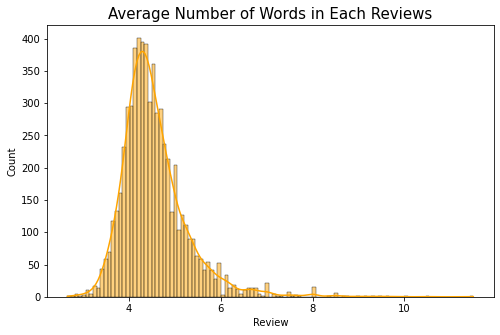

In [ ]:
_=plt.figure(figsize=(8, 5))
_=sns.histplot(train['Review'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x:np.mean(x))
,kde=True,color='Orange')
_=plt.title( 'Average Number of Words in Each Reviews',fontsize=15)


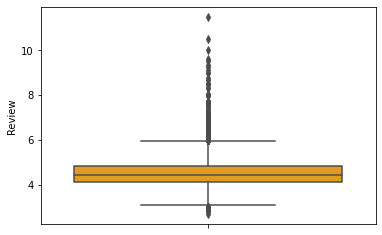

In [ ]:
sns.boxplot(y=train['Review'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x:np.mean(x)),
            color='Orange');

In [ ]:
train['Review'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x:np.mean(x)).describe()

count    6136.000000
mean        4.560195
std         0.723039
min         2.666667
25%         4.117647
50%         4.428571
75%         4.848573
max        11.500000
Name: Review, dtype: float64

#### The above histogram explains that the average words used in each review is 4.

#### The average word in review are ranging from 2 to 11.

### Let's create a dataframe to collect target label group level number of characters, number of words, number of average words in the review. 

In [ ]:
txt_info=train.iloc[:,2:14]
for i in range(3):
   txt_info['characters']=train['Review'].str.len()
   txt_info['words']=train['Review'].str.split().map(lambda x: len(x))
   txt_info['avg_words']=train['Review'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x:np.mean(x))
   


### Let's see how character length in each review differed across the different target label groups.

In [ ]:
def target_grp_hist(df,valcol,title=''):
  fig=plt.subplots(figsize=(15, 15))
  for i,col in enumerate(df.iloc[:,0:12].columns.values): 
    _=plt.subplot(6,2,i+1)
    _=sns.histplot(x=df[valcol],hue=txt_info[col])
    _=plt.title(col+title,fontsize=15)
    _=plt.xlabel(col,fontsize=10)
    _=plt.xticks(fontsize=15)
    _=plt.tight_layout()  
  plt.show()

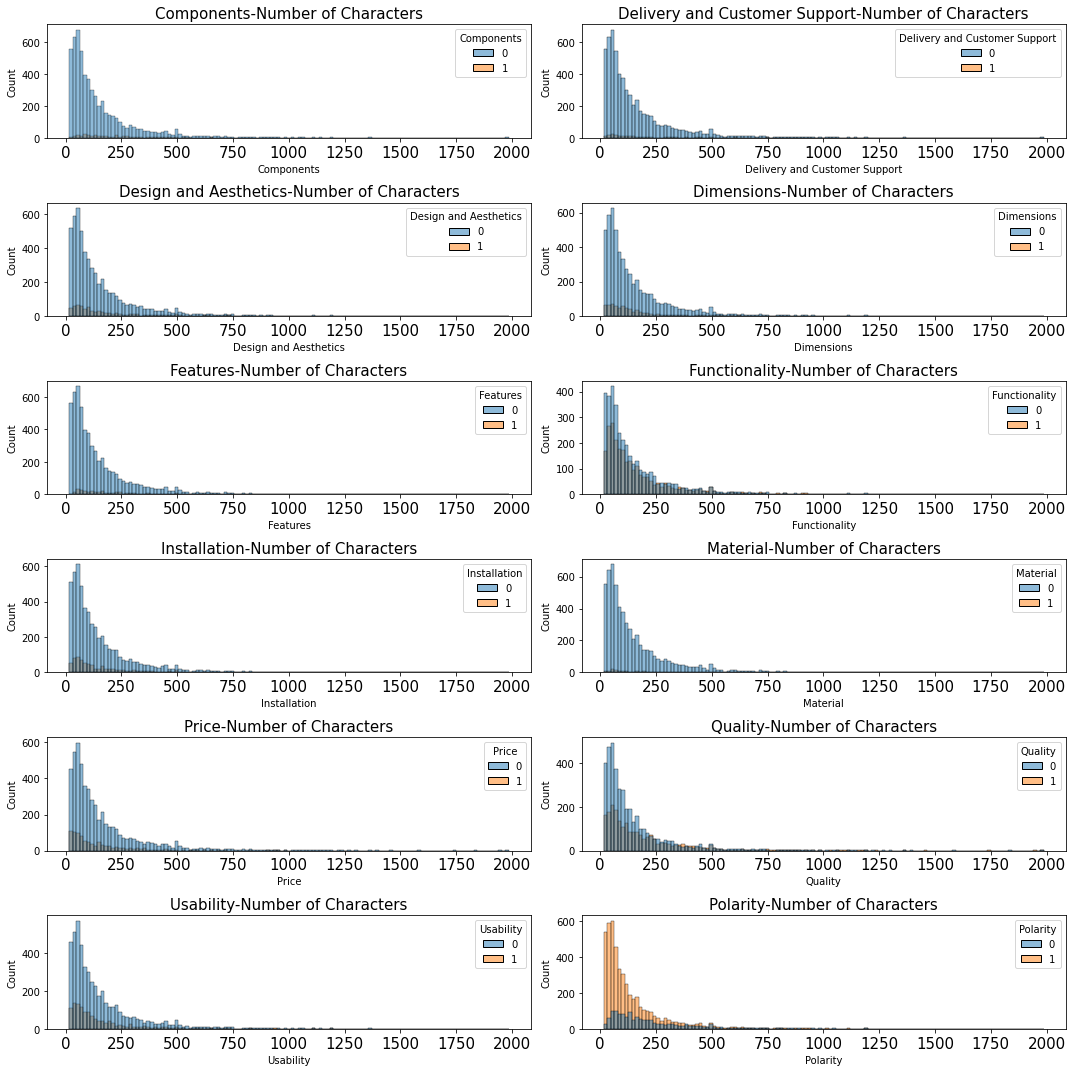

In [ ]:
target_grp_hist(txt_info,'characters','-Number of Characters')

In [ ]:
def target_grp_box(df,valcol,title=''):
  fig=plt.subplots(figsize=(15, 15))
  for i,col in enumerate(df.iloc[:,0:12].columns.values): 
    _=plt.subplot(6,2,i+1)
    _=sns.boxplot(x=txt_info[col],y=df[valcol])
    _=plt.title(col+title,fontsize=15)
    _=plt.xlabel(col,fontsize=10)
    _=plt.xticks(fontsize=15)
    _=plt.tight_layout()  
  plt.show()

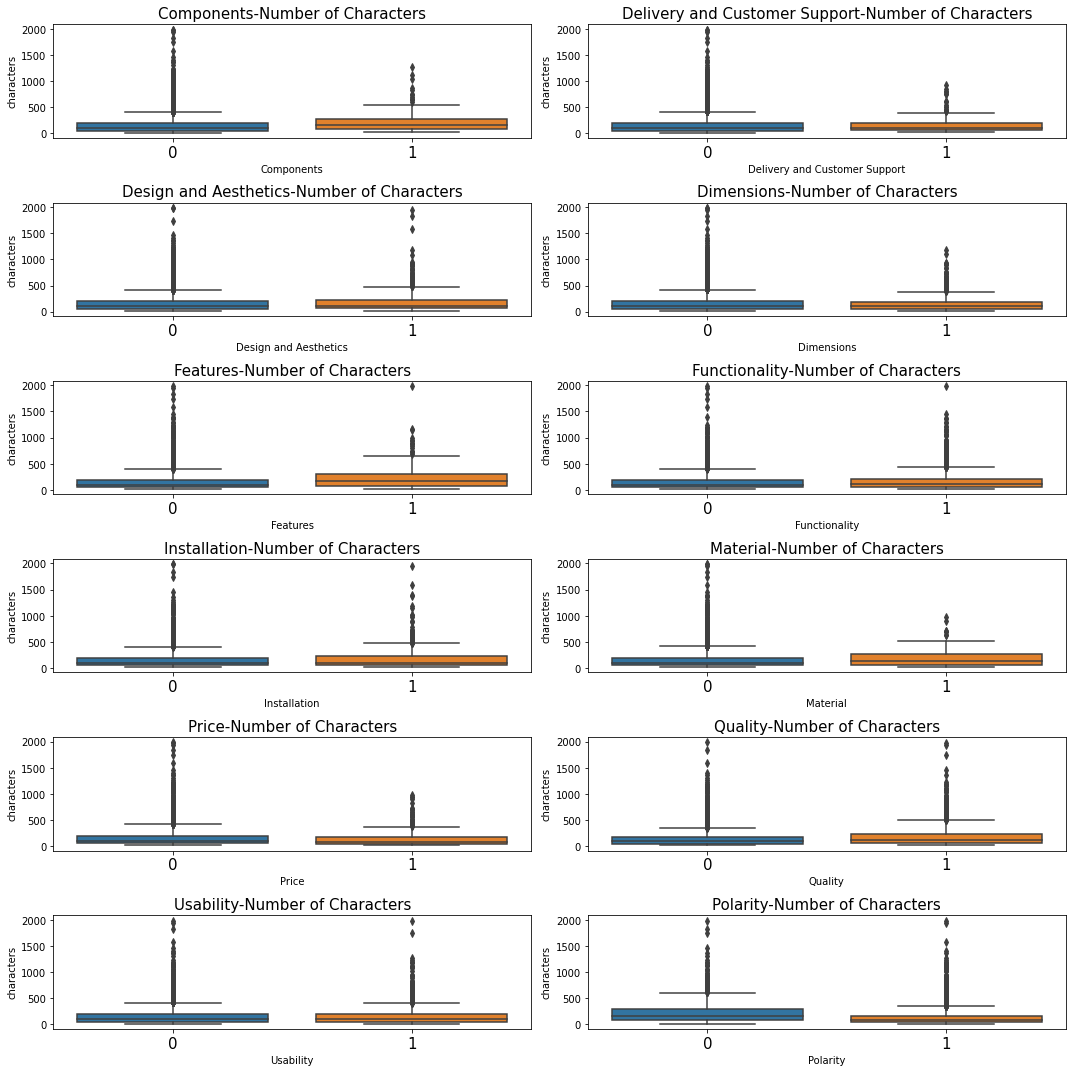

In [ ]:
target_grp_box(txt_info,'characters','-Number of Characters')

In [ ]:
def target_grp_summary(df,valcol):
  for col in df.iloc[:,0:12].columns.values:
    print("="*100)
    print(f"{df.groupby([col])[valcol].describe()}")
    print("-"*100)

In [ ]:
target_grp_summary(txt_info,'characters')    

             count        mean         std   min   25%    50%    75%     max
Components                                                                  
0           5862.0  158.237632  173.755273  16.0  54.0  100.0  196.0  1987.0
1            274.0  220.368613  186.163422  21.0  92.0  170.0  278.5  1271.0
----------------------------------------------------------------------------------------------------
                                count        mean  ...    75%     max
Delivery and Customer Support                      ...               
0                              5957.0  160.752392  ...  200.0  1987.0
1                               179.0  169.653631  ...  196.0   930.0

[2 rows x 8 columns]
----------------------------------------------------------------------------------------------------
                        count        mean         std  ...    50%    75%     max
Design and Aesthetics                                  ...                      
0                      548

### Let's see how number of words in each review  differed across the different target label groups.

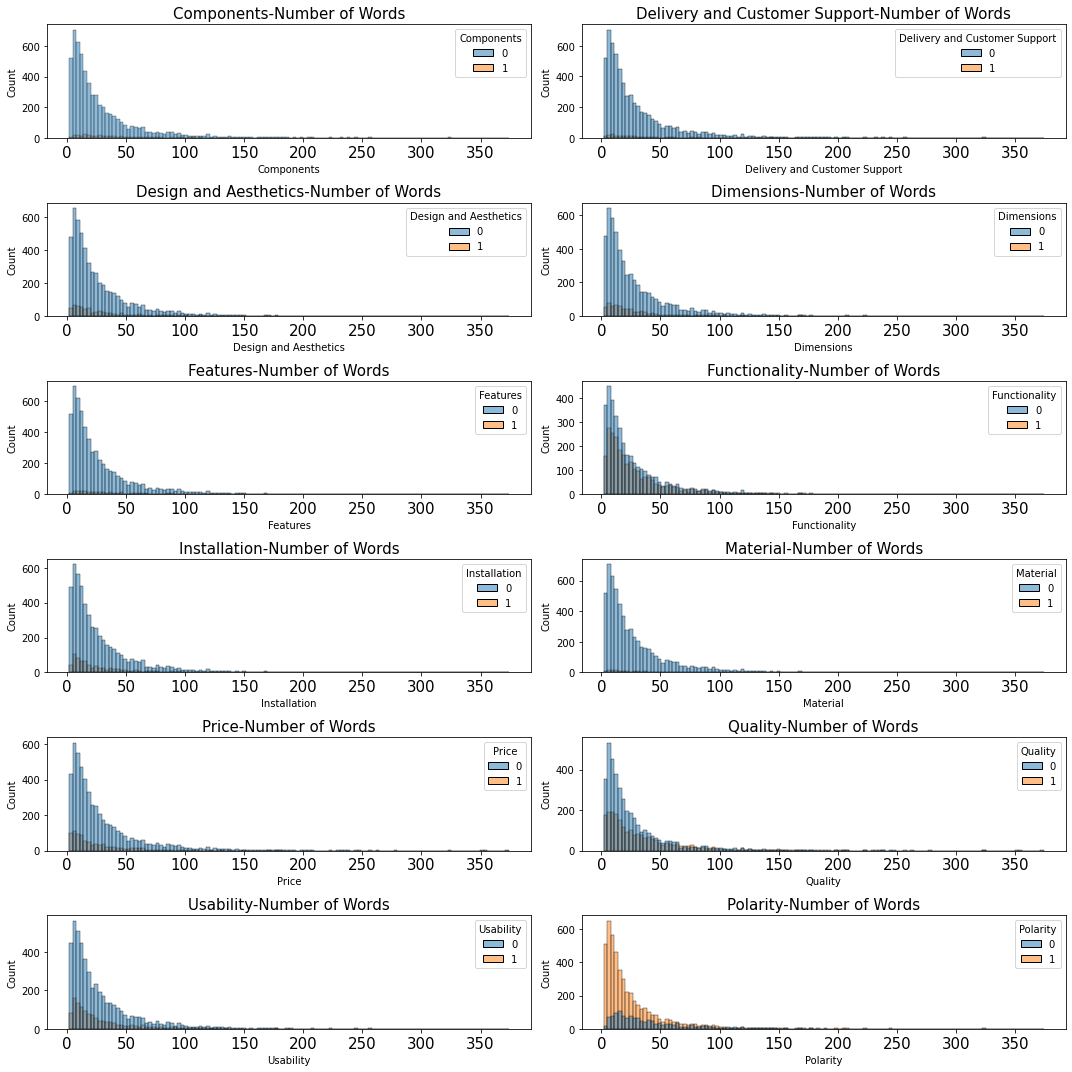

In [ ]:
target_grp_hist(txt_info,'words','-Number of Words')

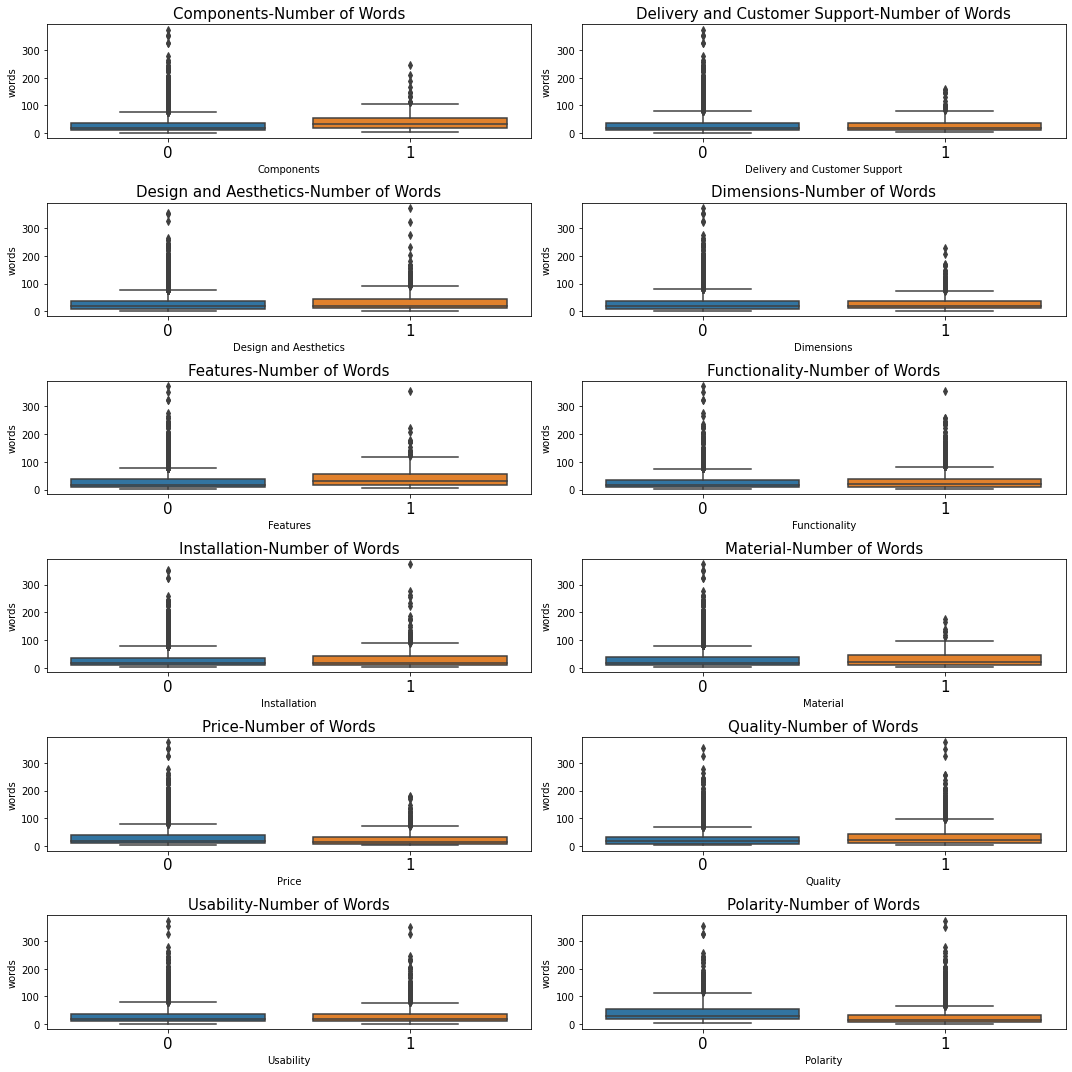

In [ ]:
target_grp_box(txt_info,'words','-Number of Words')

In [ ]:
target_grp_summary(txt_info,'words')

             count       mean        std  min   25%   50%    75%    max
Components                                                             
0           5862.0  29.480382  32.595648  2.0  10.0  18.0  37.00  374.0
1            274.0  41.306569  34.964045  4.0  17.0  32.0  54.75  246.0
----------------------------------------------------------------------------------------------------
                                count       mean        std  ...   50%   75%    max
Delivery and Customer Support                                ...                   
0                              5957.0  29.988921  32.820393  ...  19.0  38.0  374.0
1                               179.0  30.659218  31.955922  ...  19.0  38.5  161.0

[2 rows x 8 columns]
----------------------------------------------------------------------------------------------------
                        count       mean        std  ...   50%   75%    max
Design and Aesthetics                                ...                   


### Let's see how average number of words in each review differed across the different target label groups.

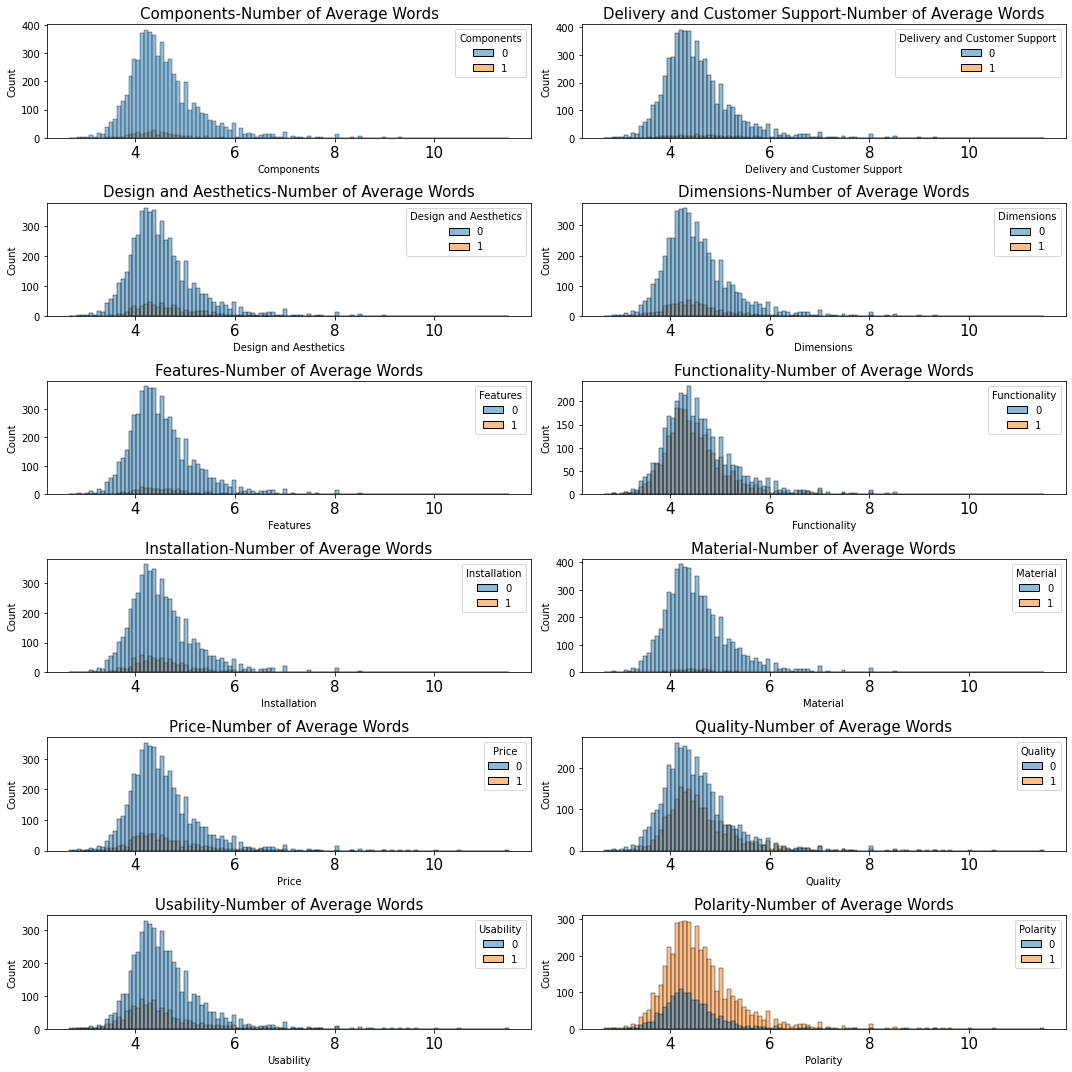

In [ ]:
target_grp_hist(txt_info,'avg_words','-Number of Average Words')

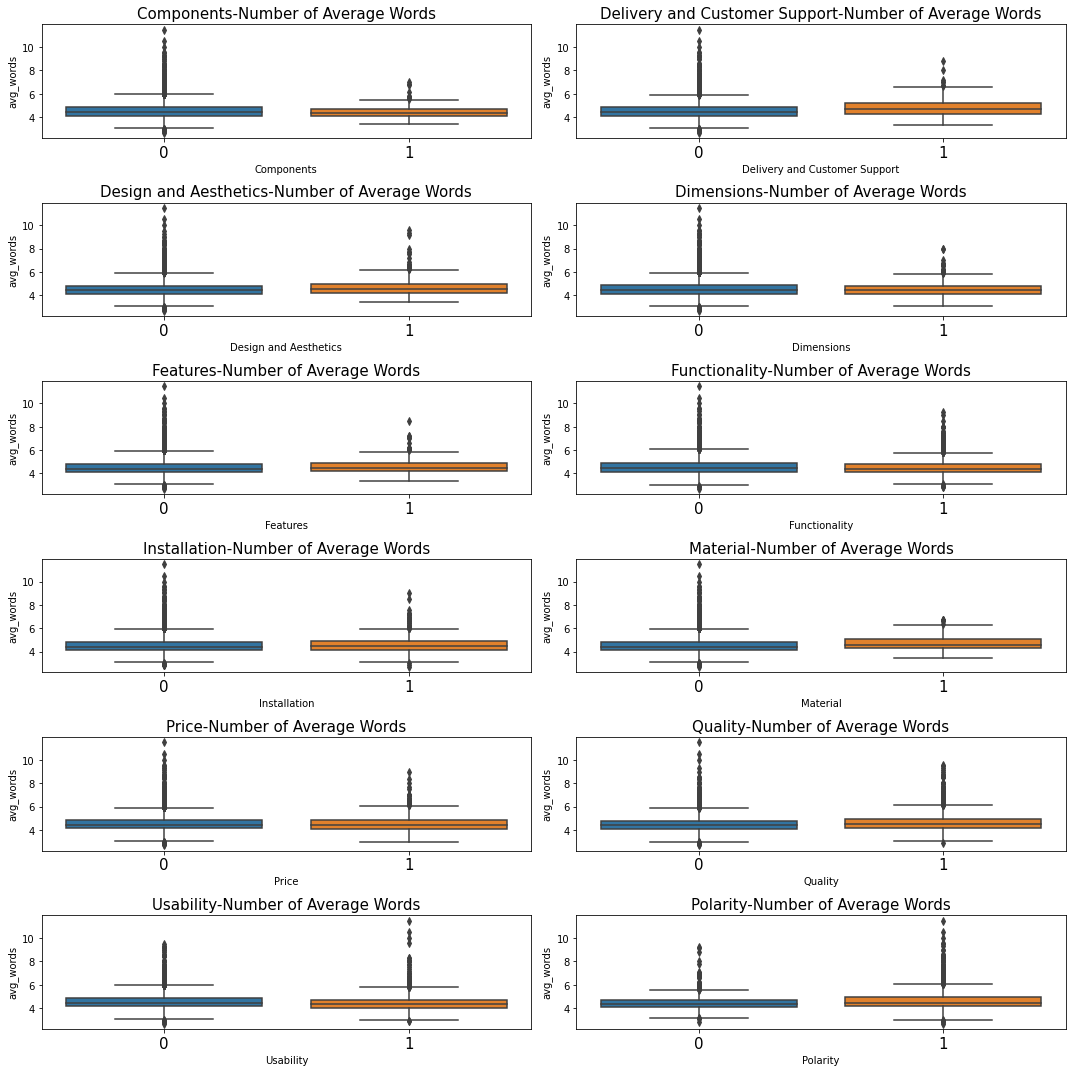

In [ ]:
target_grp_box(txt_info,'avg_words','-Number of Average Words')

In [ ]:
target_grp_summary(txt_info,'avg_words')

             count      mean       std  ...       50%       75%   max
Components                              ...                          
0           5862.0  4.566210  0.730161  ...  4.428571  4.857143  11.5
1            274.0  4.431509  0.533932  ...  4.366987  4.665179   7.0

[2 rows x 8 columns]
----------------------------------------------------------------------------------------------------
                                count      mean  ...       75%        max
Delivery and Customer Support                    ...                     
0                              5957.0  4.552429  ...  4.833333  11.500000
1                               179.0  4.818642  ...  5.193750   8.769231

[2 rows x 8 columns]
----------------------------------------------------------------------------------------------------
                        count      mean       std  ...       50%       75%   max
Design and Aesthetics                              ...                          
0               

#### The above chart explains that the mean of the number of average words in each review is almost the same in all target groups.

#### Let'see most used stopwords in review.

In [ ]:
from collections import defaultdict

In [ ]:
stopWords = set(stopwords.words('english'))
words = word_tokenize(train['Review'].to_string().lower())


In [ ]:
dic=defaultdict(int)
for word in words:
    if word in stopWords:
        dic[word]+=1

In [ ]:
list(dict(Counter(dic).most_common(20)).items())

[('the', 2010),
 ('i', 1694),
 ('to', 1636),
 ('and', 1594),
 ('a', 1188),
 ('it', 1010),
 ('this', 1005),
 ('for', 864),
 ('is', 738),
 ('very', 658),
 ('my', 541),
 ('was', 498),
 ('of', 486),
 ('these', 462),
 ('in', 407),
 ('with', 401),
 ('have', 360),
 ('not', 324),
 ('are', 312),
 ('but', 295)]

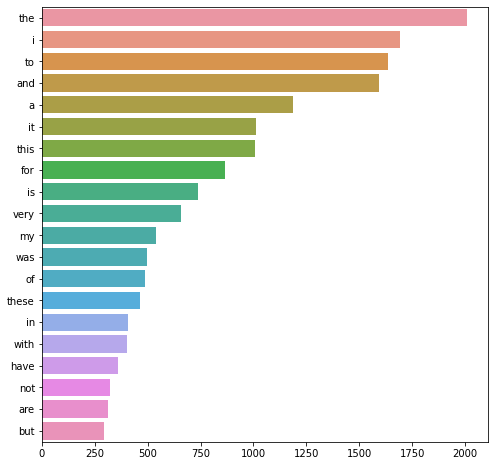

In [ ]:
_=plt.figure(figsize=(8,8))
sns.barplot(x=list(dict(Counter(dic).most_common(20)).values()),
            y=list(dict(Counter(dic).most_common(20)).keys())
            );

#### The above barplot explains that **the** is most used stopword in review.

### Let's see most used words other than stopwrods.

In [ ]:
dic1=defaultdict(int)
for word in words:
    if word not in stopWords:
        dic1[word]+=1

In [ ]:
list(dict(Counter(dic1).most_common(20)).items())

[('...', 4919),
 ('.', 2534),
 (',', 1207),
 ('great', 1048),
 ('easy', 908),
 ('good', 560),
 ('works', 521),
 ('well', 487),
 ('!', 456),
 ('use', 435),
 ('quality', 349),
 ('product', 340),
 ('install', 315),
 ('worked', 313),
 ('price', 263),
 ('love', 251),
 ('work', 245),
 ('like', 229),
 ("n't", 208),
 ('bought', 205)]

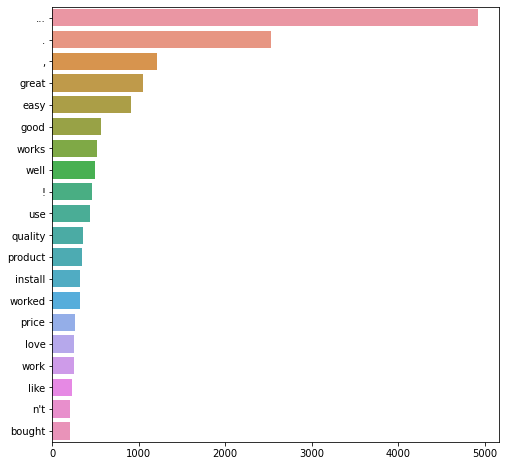

In [ ]:
_=plt.figure(figsize=(8,8))
sns.barplot(x=list(dict(Counter(dic1).most_common(20)).values()),
            y=list(dict(Counter(dic1).most_common(20)).keys())
            );

#### The above barplot explains that **...** symbol is most used in the reviews.

#### **Note:The result based on raw text**

### Let's see top Bi-gram in review.

In [ ]:
def top_ngram(txt=None,n=0):
  n_gram=(pd.Series(nltk.ngrams(txt, n)).value_counts().sort_values(ascending=False))[:10]
  return n_gram, sns.barplot(x=n_gram.values,
                            y=n_gram.index);

((easy, to)        749
 (to, use)         303
 (to, install)     264
 (., i)            233
 (works, great)    188
 (i, have)         173
 (for, the)        168
 (this, is)        146
 (t, ...)          129
 (., it)           127
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x7f7b7a83b410>)

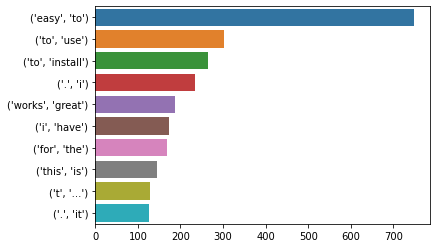

In [ ]:
top_ngram(words,2)

#### The above chart explains that **(easy,to)** is most used bi-gram word in reviews.

### Let's see top Tri-gram in review.

((easy, to, use)        251
 (easy, to, install)    226
 (very, easy, to)       104
 (to, use, .)            82
 (for, the, price)       80
 (to, install, .)        79
 (to, use, and)          71
 (and, easy, to)         68
 (this, is, a)           66
 (was, easy, to)         63
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x7f7b7ace6d90>)

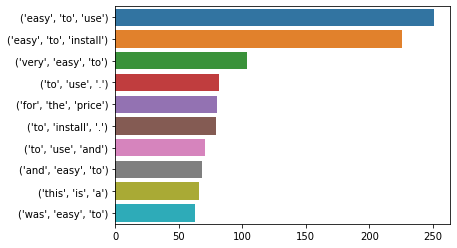

In [ ]:
top_ngram(words,3)

#### The above chart explains that **(easy to use)** is most used tri-gram in reviews.

### Let's extract the named entity informations in review and classify them in pre-defined categories.

### Tokenize the review and then use the english pipe line to extract the named entity informations. 

In [ ]:
doc=nlp(" ".join([j for i in train['Review'].str.split() for j in i]))

In [ ]:
all_ent=[(x.text,x.label_) for x in doc.ents]

### Store entities and text in dataframe.

In [ ]:
cat_ents=pd.DataFrame()
cat_ents['cat_ent']=[j for i ,j in all_ent]
cat_ents['txt']=[i for i ,j in all_ent]

### Let's see top named entity information category.

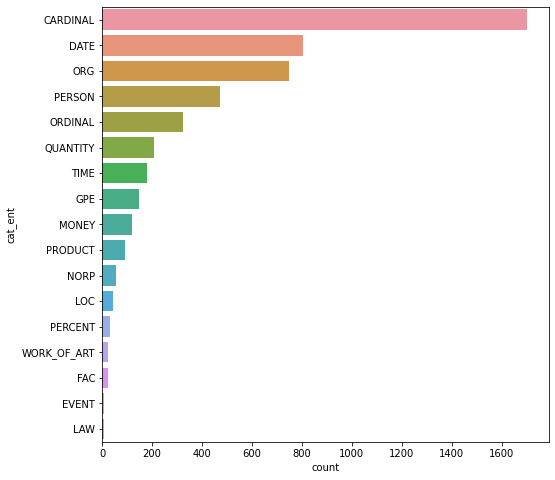

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y=cat_ents['cat_ent'],order=cat_ents['cat_ent'].value_counts().index);

#### The above inforamtion shows that cardinal, date, org are top named enity information category.

### Let's see what are the tokens classified under top 10 named entity category.

In [ ]:
clr=[]
for name, hex in matplotlib.colors.cnames.items():
  if 'dark' in name:
    clr.append(name)

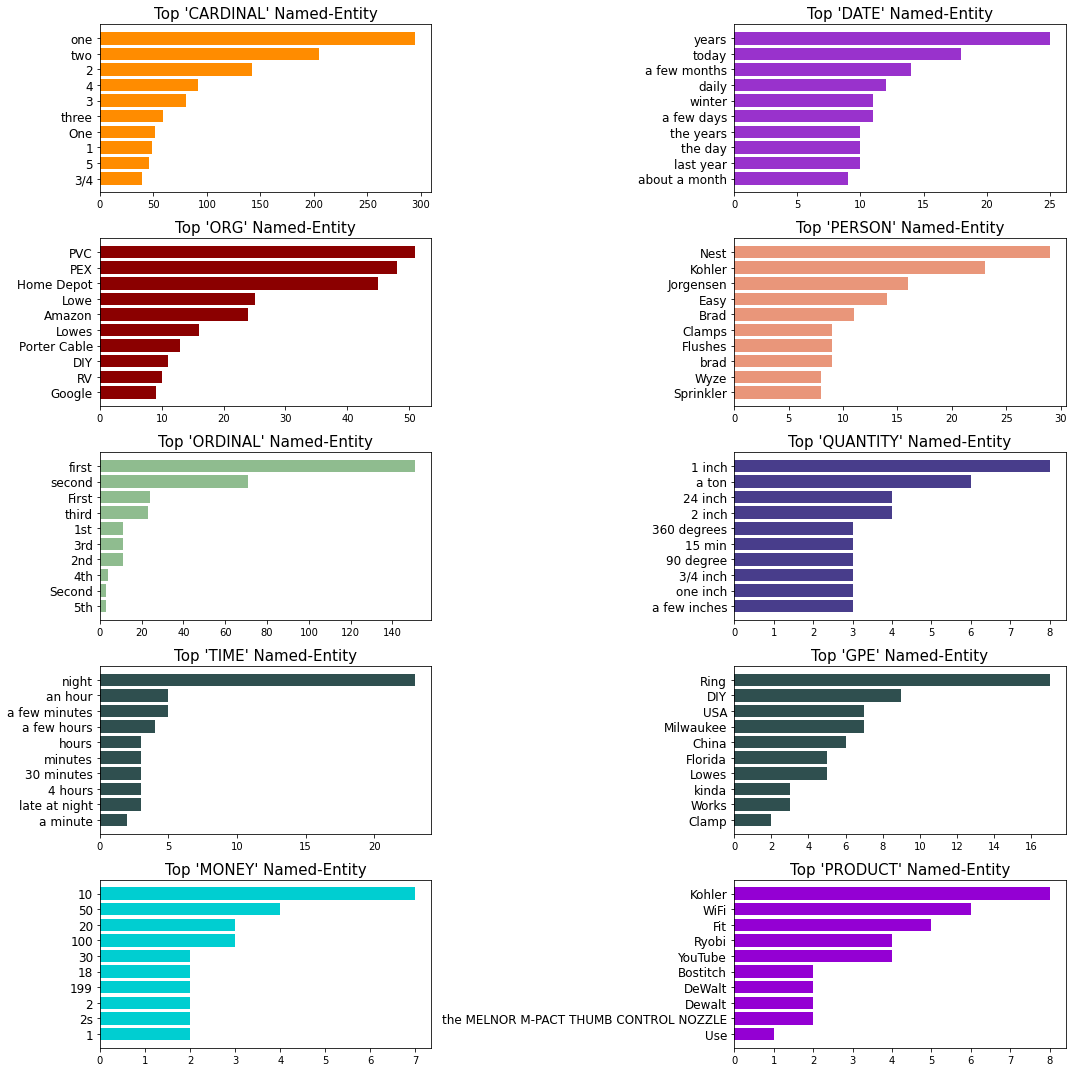

In [ ]:
fig=plt.subplots(figsize=(15, 15))
for i,(col,clrs)  in enumerate(zip(cat_ents['cat_ent'].value_counts().nlargest(10).index.values
                                   ,clr[9:19])):    
       _=plt.subplot(5,2,i+1)
       df=(cat_ents[cat_ents['cat_ent']==col].groupby(['txt'])['txt'].agg({'count'}).
           reset_index().sort_values('count',ascending=False)[:10])
       df=df.sort_values('count')
       _=plt.barh(df['txt'],df['count'],color=clrs)
       _=plt.title(f"Top '{col}' Named-Entity",fontsize=15)
       _=plt.ylabel("")
       _=plt.yticks(fontsize=12)
       _=plt.tight_layout()  
plt.show()  

### Let's classify the words into parts of speech.  

### Let's use nltk pos_tagger function and classify the words.

In [ ]:
pos=nltk.pos_tag(word_tokenize(" ".join([j for i in train['Review'].str.split() for j in i])))

In [ ]:
pos_tag=pd.DataFrame()
pos_tag['tag']=[j for i ,j in pos]
pos_tag['txt']=[i for i ,j in pos]

### Let's see top used POS tag.

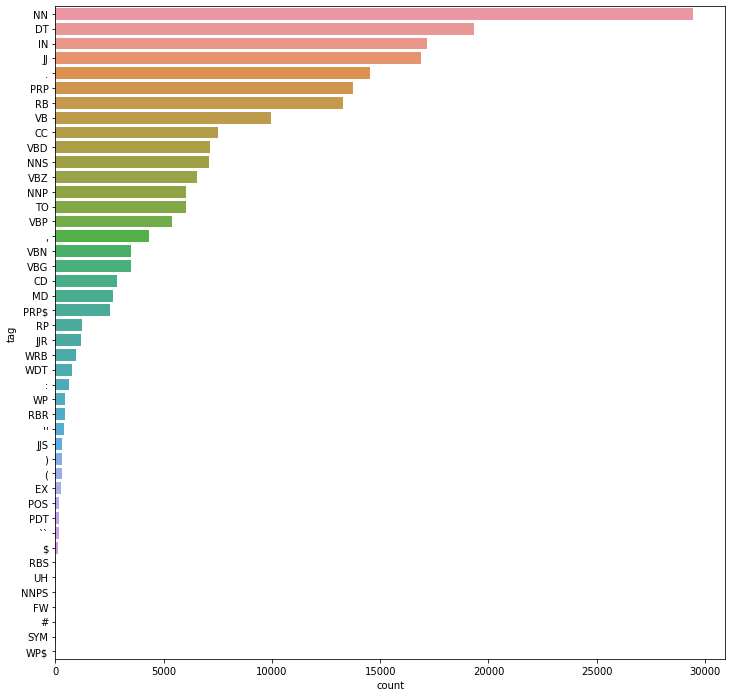

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(y=pos_tag['tag'],order=pos_tag['tag'].value_counts().index);

#### The above chart shows that most words in the review are tagged under nouns, determiners, prepositions, or conjunctions.

#### Let's see what are the words classified under the top pos tag category. 

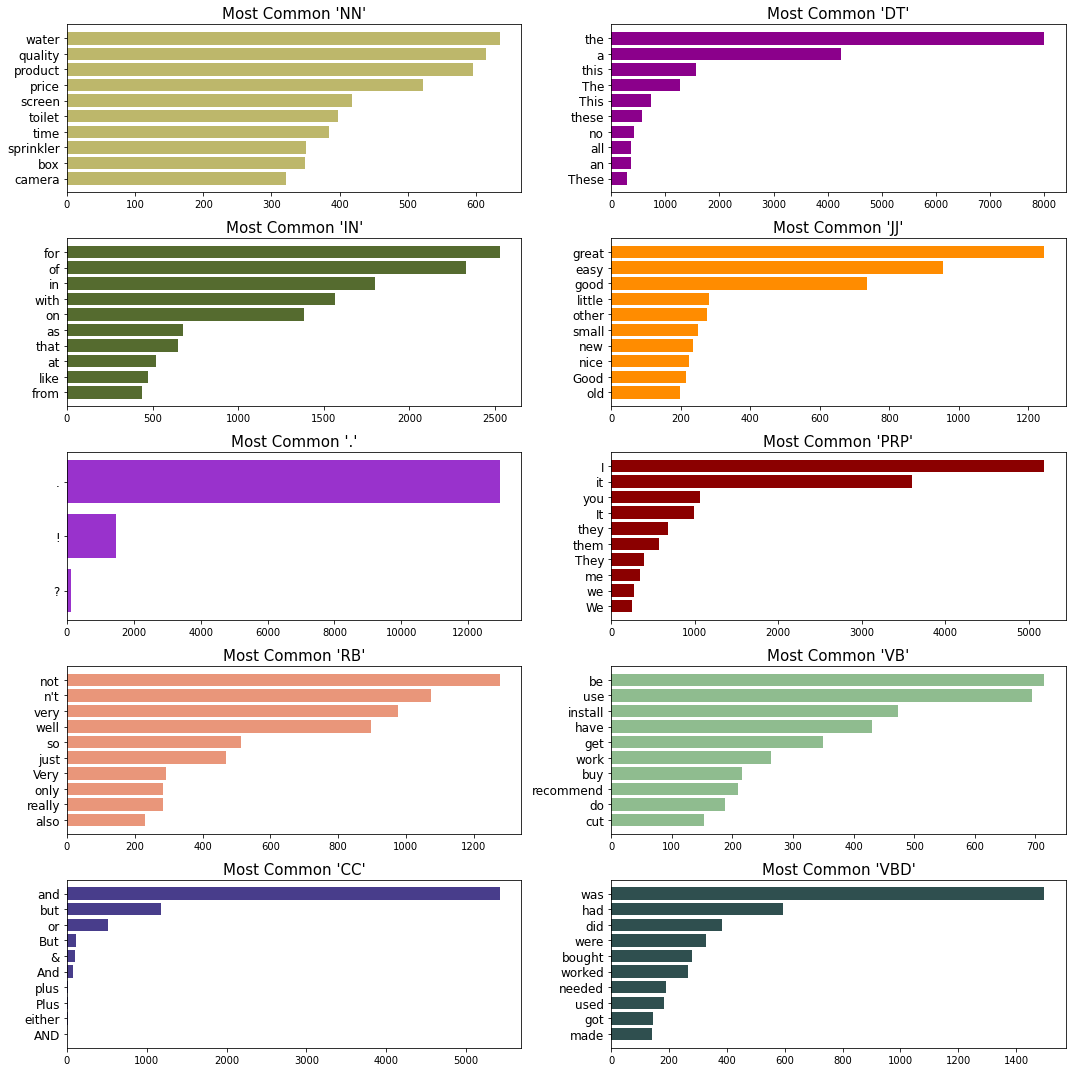

In [ ]:
fig=plt.subplots(figsize=(15, 15))
for i,(col,clrs)  in enumerate(zip(pos_tag['tag'].value_counts().nlargest(10).index.values
                                   ,clr[6:16])):    
       _=plt.subplot(5,2,i+1)
       df=(pos_tag[pos_tag['tag']==col].groupby(['txt'])['txt'].agg({'count'}).
           reset_index().sort_values('count',ascending=False)[:10])
       df=df.sort_values('count')
       _=plt.barh(df['txt'],df['count'],color=clrs)
       _=plt.title(f"Most Common '{col}'",fontsize=15)
       _=plt.ylabel("")
       _=plt.yticks(fontsize=12)
       _=plt.tight_layout()  
plt.show()  

### Let's see is there any url link used in reviews.

In [ ]:
train[train['Review'].str.lower().str.contains("(https:?\/\/[www]?.+)")]['Review']

442     used them to install these: https://www.lowes....
1576    Grateful i can make screens, but since the dir...
Name: Review, dtype: object

#### There are two reviews that contains url link.

### Let's see is there numbers used in review.

In [ ]:
train[train['Review'].str.contains("(\d+)")]['Review'][6123]

"As a Google Home user, I already had a Mini, a Mini Hub, several Chromecasts and smart lights. This was very easy to set up and connect. The image quality is great, night image quality is also great. The only feature that is lacking is volume control on the camera's speaker. When I want to talk through the camera, it's practically inaudible outside. But that's not really an important feature so as a camera, this is a perfect choice. I went back to the store and bought a 2 pack. The Nest Aware s..."

In [ ]:
def digits(text):
    res=text.str.lower().str.extract("(\d+|\d+\.\d+)")
    return res.dropna().value_counts().nlargest(10), res.dropna().value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,10))

(2      179
 1      148
 3      134
 4       94
 5       72
 30      34
 10      32
 6       26
 100     24
 20      24
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x7f77e98a9f10>)

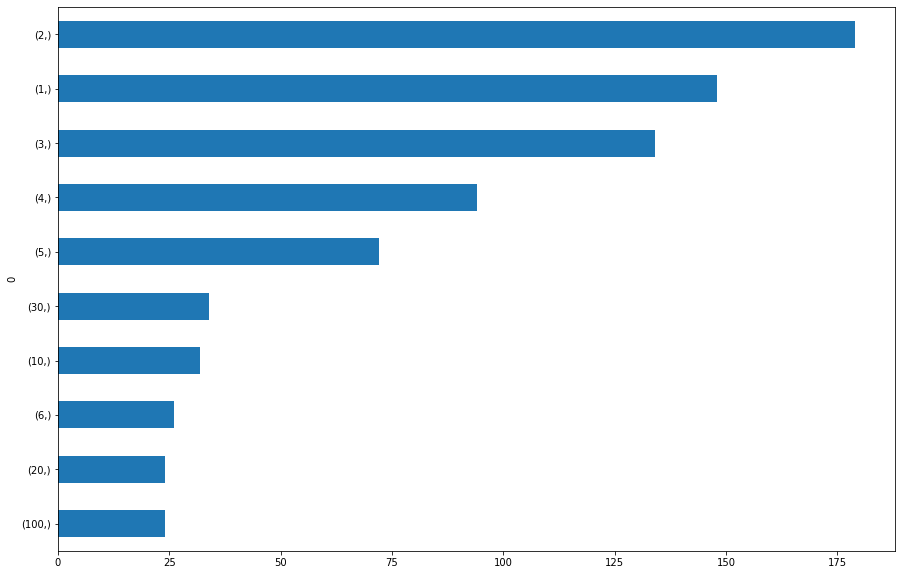

In [ ]:
digits(train['Review'])

### Most used mixed (Formal,Informal) Contractions.

In [ ]:
def mixed_contraction(text):
    res=text.str.lower().str.extract("([a-zA-Z]+'[a-zA-Z]+)")
    return res.dropna().value_counts().nlargest(10), res.dropna().value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,10))

(it's        285
 don't       153
 doesn't     121
 didn't      119
 i'm         109
 i've        107
 can't        84
 haven't      39
 won't        37
 wouldn't     36
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x7f41273bc4d0>)

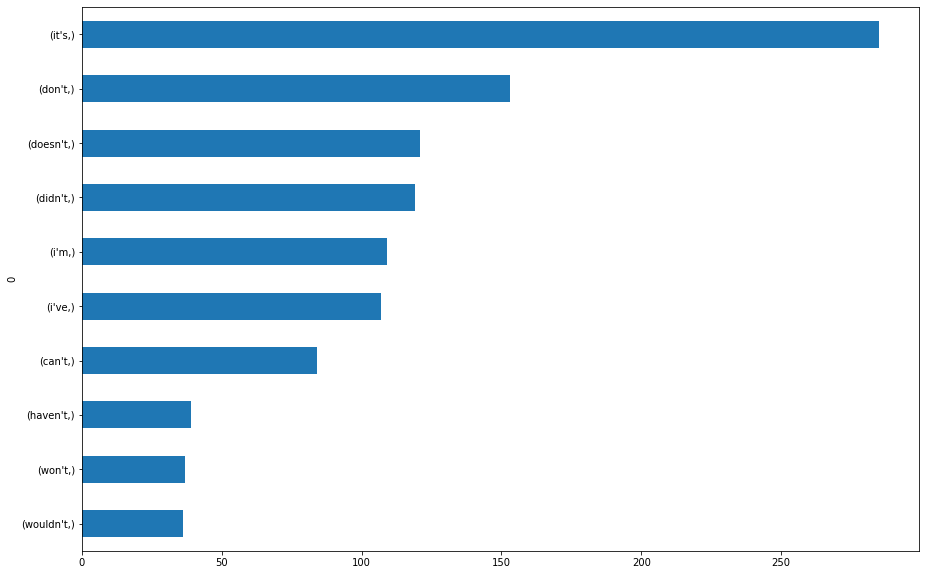

In [ ]:
mixed_contraction(train['Review'])

### Let's see is there any diacritics in review.

In [ ]:
def non_ascii(text):
    res=text.str.lower().str.extract("([^\x00-\x7F]+)")
    return res.dropna().value_counts().nlargest(20), res.dropna().value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,10))


(â€¦                  9
 â€™                  6
 ’                    4
 â€”                  4
 â°                   2
 â€¼ï¸               1
 â°                  1
 â¤ï¸               1
 â                    1
 â­ï¸               1
 âœ¨                  1
 â˜¹ï¸               1
 â˜ºï¸               1
 â€“                  1
 ðÿ’¯ðÿ’¯             1
 ðÿ¤·ðÿ¿â€â™‚ï¸    1
 ðÿ¤žðÿ½             1
 ðÿ˜ðÿ’¯             1
 ðÿ˜³                 1
 ðÿ˜€                 1
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x7f77fb3b4f10>)

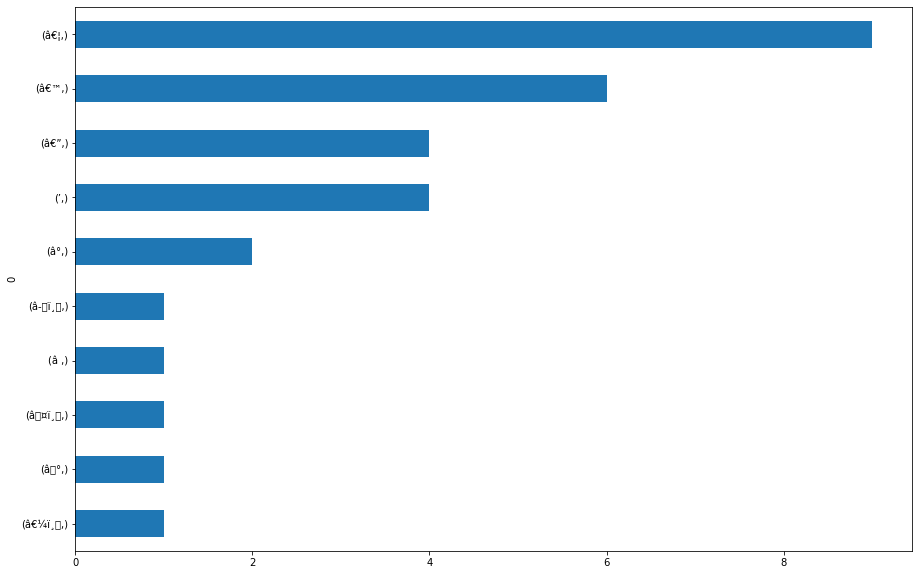

In [ ]:
non_ascii(train['Review'])

### Let's see is there any currency symbol in review.

In [ ]:
def currency(text):
    res=text.str.lower().str.extract("([$¢£¤¥֏؋৲৳৻૱௹฿៛\u20a0-\u20bd\ua838\ufdfc\ufe69\uff04\uffe0\uffe1\uffe5\uffe6])")
    return res.dropna().value_counts().nlargest(10), res.dropna().value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh',figsize=(8,5))


($    84
 €    22
 ¤     2
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x7f41286f10d0>)

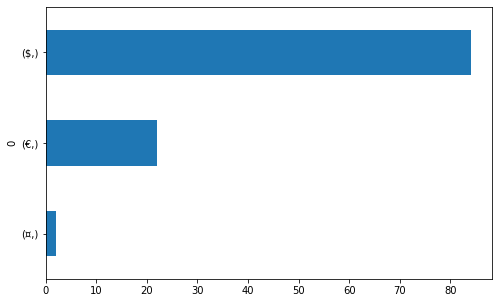

In [ ]:
currency(train['Review'])

In [ ]:
def remove_stopwords(x:str):
    lst = [i for i in x.split(" ") if i not in stopWords]
    final = ' '.join(lst)
    return final

In [ ]:
def lemmati(x:str):
  lst = [lemmatizer.lemmatize(i) for i in x.split(" ")]
  final=" ".join(lst)
  return final


In [ ]:
def stem(x:str):
  lst = [porter.stem(i) for i in x.split(" ")]
  final=" ".join(lst)
  return final

In [ ]:
train['Review'][100]

'Cushions holding up well after a month of use. Color and size is accurate. Seller provides great customer service with quick communication and follow up.'

In [ ]:
stem("""Cushions holding up well after a month of use. Color and size is accurate.
 Seller provides great customer service with quick communication and follow up.""")

'cushion hold up well after a month of use. color and size is accurate.\n seller provid great custom servic with quick commun and follow up.'

In [ ]:
lemmati("""Cushions holding up well after a month of use. Color and size is accurate.
 Seller provides great customer service with quick communication and follow up.""")

'Cushions holding up well after a month of use. Color and size is accurate.\n Seller provides great customer service with quick communication and follow up.'

In [ ]:
def text_pre_process(strings):
    txt=strings.lower()  # convert text to lowercse
    txt=re.sub('(https:?\/\/[www]?.+)','',txt) # remove url
    txt=unidecode.unidecode(txt) # diacritics remove
    txt=contractions.fix(txt) # contraction fix
    txt=re.sub('(\d+)',' ',txt) # remove numbers
    txt=re.sub('[^\w\s]',' ',txt) # remove punctuations
    txt=remove_stopwords(txt)
    txt=lemmati(txt)
    return txt
